In [1]:
import os
import torch
import pwcca
import timeit
import random
import librosa
import opensmile
import numpy as np
import pandas as pd
import seaborn as sns
import torch.nn as nn
import soundfile as sf
from scipy import signal
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import CCA
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler, normalize
from transformers import Wav2Vec2Model, Wav2Vec2Processor
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
w2v_model = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base-960h").to(device)
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")

Some weights of the model checkpoint at facebook/wav2vec2-base-960h were not used when initializing Wav2Vec2Model: ['lm_head.weight', 'lm_head.bias']
- This IS expected if you are initializing Wav2Vec2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [12]:
# feature extraction

smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.LowLevelDescriptors,
)

path = '/afs/inf.ed.ac.uk/user/s20/s2057508/Documents/Corpora/RAVDESS/Data'

hct1_A = np.array([])
hct1_H = np.array([])
hct1_N = np.array([])
hct1_S = np.array([])
hct1_C = np.array([])
hct1_D = np.array([])
hct1_F = np.array([])
hct1_X = np.array([])

hct2_A = np.array([])
hct2_H = np.array([])
hct2_N = np.array([])
hct2_S = np.array([])
hct2_C = np.array([])
hct2_D = np.array([])
hct2_F = np.array([])
hct2_X = np.array([])

hct3_A = np.array([])
hct3_H = np.array([])
hct3_N = np.array([])
hct3_S = np.array([])
hct3_C = np.array([])
hct3_D = np.array([])
hct3_F = np.array([])
hct3_X = np.array([])

hct4_A = np.array([])
hct4_H = np.array([])
hct4_N = np.array([])
hct4_S = np.array([])
hct4_C = np.array([])
hct4_D = np.array([])
hct4_F = np.array([])
hct4_X = np.array([])

hct5_A = np.array([])
hct5_H = np.array([])
hct5_N = np.array([])
hct5_S = np.array([])
hct5_C = np.array([])
hct5_D = np.array([])
hct5_F = np.array([])
hct5_X = np.array([])

w2v0_A = np.array([])
w2v0_H = np.array([])
w2v0_N = np.array([])
w2v0_S = np.array([])
w2v0_C = np.array([])
w2v0_D = np.array([])
w2v0_F = np.array([])
w2v0_X = np.array([])

w2v1_A = np.array([])
w2v1_H = np.array([])
w2v1_N = np.array([])
w2v1_S = np.array([])
w2v1_C = np.array([])
w2v1_D = np.array([])
w2v1_F = np.array([])
w2v1_X = np.array([])

w2v2_A = np.array([])
w2v2_H = np.array([])
w2v2_N = np.array([])
w2v2_S = np.array([])
w2v2_C = np.array([])
w2v2_D = np.array([])
w2v2_F = np.array([])
w2v2_X = np.array([])

w2v3_A = np.array([])
w2v3_H = np.array([])
w2v3_N = np.array([])
w2v3_S = np.array([])
w2v3_C = np.array([])
w2v3_D = np.array([])
w2v3_F = np.array([])
w2v3_X = np.array([])

w2v4_A = np.array([])
w2v4_H = np.array([])
w2v4_N = np.array([])
w2v4_S = np.array([])
w2v4_C = np.array([])
w2v4_D = np.array([])
w2v4_F = np.array([])
w2v4_X = np.array([])

w2v5_A = np.array([])
w2v5_H = np.array([])
w2v5_N = np.array([])
w2v5_S = np.array([])
w2v5_C = np.array([])
w2v5_D = np.array([])
w2v5_F = np.array([])
w2v5_X = np.array([])

w2v6_A = np.array([])
w2v6_H = np.array([])
w2v6_N = np.array([])
w2v6_S = np.array([])
w2v6_C = np.array([])
w2v6_D = np.array([])
w2v6_F = np.array([])
w2v6_X = np.array([])

w2v7_A = np.array([])
w2v7_H = np.array([])
w2v7_N = np.array([])
w2v7_S = np.array([])
w2v7_C = np.array([])
w2v7_D = np.array([])
w2v7_F = np.array([])
w2v7_X = np.array([])

w2v8_A = np.array([])
w2v8_H = np.array([])
w2v8_N = np.array([])
w2v8_S = np.array([])
w2v8_C = np.array([])
w2v8_D = np.array([])
w2v8_F = np.array([])
w2v8_X = np.array([])

w2v9_A = np.array([])
w2v9_H = np.array([])
w2v9_N = np.array([])
w2v9_S = np.array([])
w2v9_C = np.array([])
w2v9_D = np.array([])
w2v9_F = np.array([])
w2v9_X = np.array([])

w2v10_A = np.array([])
w2v10_H = np.array([])
w2v10_N = np.array([])
w2v10_S = np.array([])
w2v10_C = np.array([])
w2v10_D = np.array([])
w2v10_F = np.array([])
w2v10_X = np.array([])

w2v11_A = np.array([])
w2v11_H = np.array([])
w2v11_N = np.array([])
w2v11_S = np.array([])
w2v11_C = np.array([])
w2v11_D = np.array([])
w2v11_F = np.array([])
w2v11_X = np.array([])

w2v12_A = np.array([])
w2v12_H = np.array([])
w2v12_N = np.array([])
w2v12_S = np.array([])
w2v12_C = np.array([])
w2v12_D = np.array([])
w2v12_F = np.array([])
w2v12_X = np.array([])

n = 1
for dirname, dirs, filenames in os.walk(path):
    #dirs[:] = [d for d in dirs if d in subset_dirs_list] # you can remove it to train the model over the entire dataset 
    for filename in filenames:
        print(n)
        #print(os.path.join(dirname, filename))
        emotion = filename[7] # the index 7 and 8 of the file name represent the emotion label
        file_name = os.path.join(dirname, filename)
        audioinput, sr = librosa.load(file_name, sr=16000)

        torch.cuda.empty_cache()

        feats = smile.process_signal(audioinput, sr)
        
        egmaps1 = []
        egmaps2 = []
        egmaps3 = []
        egmaps4 = []

# # frequency
        egmaps1.append(feats['F0semitoneFrom27.5Hz_sma3nz'].values)
        egmaps1.append(feats['F1frequency_sma3nz'].values)
        egmaps1.append(feats['F1bandwidth_sma3nz'].values)
        egmaps1.append(feats['F2frequency_sma3nz'].values)
        egmaps1.append(feats['F3frequency_sma3nz'].values)
        
# # energy
        egmaps2.append(feats['Loudness_sma3'].values)
        egmaps2.append(feats['HNRdBACF_sma3nz'].values)

# # spectral
        egmaps3.append(feats['alphaRatio_sma3'].values)
        egmaps3.append(feats['hammarbergIndex_sma3'].values)
        egmaps3.append(feats['slope0-500_sma3'].values)
        egmaps3.append(feats['slope500-1500_sma3'].values)
        egmaps3.append(feats['logRelF0-H1-H2_sma3nz'].values)
        egmaps3.append(feats['logRelF0-H1-A3_sma3nz'].values)
        egmaps3.append(feats['F1amplitudeLogRelF0_sma3nz'].values)
        egmaps3.append(feats['F2amplitudeLogRelF0_sma3nz'].values)
        egmaps3.append(feats['F3amplitudeLogRelF0_sma3nz'].values)

# # voice quality
        egmaps4.append(feats['jitterLocal_sma3nz'].values)
        egmaps4.append(feats['shimmerLocaldB_sma3nz'].values)

# #     spectral features
        mfcc = librosa.feature.mfcc(y=audioinput, sr=sr, n_fft=400, hop_length=160, n_mfcc=20).T
        
#         mel = librosa.feature.melspectrogram(y=audioinput, sr=sr, n_fft=400, hop_length=160, power=1.0).T
        
        egmaps1 = np.array(egmaps1).T
        egmaps2 = np.array(egmaps2).T
        egmaps3 = np.array(egmaps3).T
        egmaps4 = np.array(egmaps4).T

#         print(egmaps1.shape, egmaps2.shape, egmaps3.shape, egmaps4.shape, mfcc.shape)
    
        #w2v features
        input_values = processor(audioinput, sampling_rate=16000, return_tensors="pt").input_values.to(device)
        w2v_feats = w2v_model(input_values, output_hidden_states=True).hidden_states
        w2v0 = np.array(w2v_feats[0].detach()[0].cpu())
        w2v1 = np.array(w2v_feats[1].detach()[0].cpu())
        w2v2 = np.array(w2v_feats[2].detach()[0].cpu())
        w2v3 = np.array(w2v_feats[3].detach()[0].cpu())
        w2v4 = np.array(w2v_feats[4].detach()[0].cpu())
        w2v5 = np.array(w2v_feats[5].detach()[0].cpu())
        w2v6 = np.array(w2v_feats[6].detach()[0].cpu())
        w2v7 = np.array(w2v_feats[7].detach()[0].cpu())
        w2v8 = np.array(w2v_feats[8].detach()[0].cpu())
        w2v9 = np.array(w2v_feats[9].detach()[0].cpu())
        w2v10 = np.array(w2v_feats[10].detach()[0].cpu())
        w2v11 = np.array(w2v_feats[11].detach()[0].cpu())
        w2v12 = np.array(w2v_feats[12].detach()[0].cpu())
        
        egmaps1 = signal.resample(egmaps1, len(w2v0))
        egmaps2 = signal.resample(egmaps2, len(w2v0))
        egmaps3 = signal.resample(egmaps3, len(w2v0))
        egmaps4 = signal.resample(egmaps4, len(w2v0))
        mfcc = signal.resample(mfcc, len(w2v0))

        torch.cuda.empty_cache()
            
    #separate accroindg to emotions
        if emotion == '1':
            if len(w2v0_N) > 0:
                w2v0_N = np.concatenate((w2v0_N, w2v0), axis=0)
                w2v1_N = np.concatenate((w2v1_N, w2v1), axis=0)
                w2v2_N = np.concatenate((w2v2_N, w2v2), axis=0)
                w2v3_N = np.concatenate((w2v3_N, w2v3), axis=0)
                w2v4_N = np.concatenate((w2v4_N, w2v4), axis=0)
                w2v5_N = np.concatenate((w2v5_N, w2v5), axis=0)
                w2v6_N = np.concatenate((w2v6_N, w2v6), axis=0)
                w2v7_N = np.concatenate((w2v7_N, w2v7), axis=0)
                w2v8_N = np.concatenate((w2v8_N, w2v8), axis=0)
                w2v9_N = np.concatenate((w2v9_N, w2v9), axis=0)
                w2v10_N = np.concatenate((w2v10_N, w2v10), axis=0)
                w2v11_N = np.concatenate((w2v11_N, w2v11), axis=0)
                w2v12_N = np.concatenate((w2v12_N, w2v12), axis=0)
                hct1_N = np.concatenate((hct1_N, egmaps1), axis=0)
                hct2_N = np.concatenate((hct2_N, egmaps2), axis=0)
                hct3_N = np.concatenate((hct3_N, egmaps3), axis=0)
                hct4_N = np.concatenate((hct4_N, egmaps4), axis=0)
                hct5_N = np.concatenate((hct5_N, mfcc), axis=0)                
            else:
                w2v0_N = w2v0
                w2v1_N = w2v1
                w2v2_N = w2v2
                w2v3_N = w2v3
                w2v4_N = w2v4
                w2v5_N = w2v5
                w2v6_N = w2v6
                w2v7_N = w2v7
                w2v8_N = w2v8
                w2v9_N = w2v9
                w2v10_N = w2v10
                w2v11_N = w2v11
                w2v12_N = w2v12
                hct1_N = egmaps1
                hct2_N = egmaps2
                hct3_N = egmaps3
                hct4_N = egmaps4
                hct5_N = mfcc

        elif emotion == '2':
            if len(w2v0_C) > 0:
                w2v0_C = np.concatenate((w2v0_C, w2v0), axis=0)
                w2v1_C = np.concatenate((w2v1_C, w2v1), axis=0)
                w2v2_C = np.concatenate((w2v2_C, w2v2), axis=0)
                w2v3_C = np.concatenate((w2v3_C, w2v3), axis=0)
                w2v4_C = np.concatenate((w2v4_C, w2v4), axis=0)
                w2v5_C = np.concatenate((w2v5_C, w2v5), axis=0)
                w2v6_C = np.concatenate((w2v6_C, w2v6), axis=0)
                w2v7_C = np.concatenate((w2v7_C, w2v7), axis=0)
                w2v8_C = np.concatenate((w2v8_C, w2v8), axis=0)
                w2v9_C = np.concatenate((w2v9_C, w2v9), axis=0)
                w2v10_C = np.concatenate((w2v10_C, w2v10), axis=0)
                w2v11_C = np.concatenate((w2v11_C, w2v11), axis=0)
                w2v12_C = np.concatenate((w2v12_C, w2v12), axis=0)             
                hct1_C = np.concatenate((hct1_C, egmaps1), axis=0)
                hct2_C = np.concatenate((hct2_C, egmaps2), axis=0)
                hct3_C = np.concatenate((hct3_C, egmaps3), axis=0)
                hct4_C = np.concatenate((hct4_C, egmaps4), axis=0)
                hct5_C = np.concatenate((hct5_C, mfcc), axis=0)
            else:
                w2v0_C = w2v0
                w2v1_C = w2v1
                w2v2_C = w2v2
                w2v3_C = w2v3
                w2v4_C = w2v4
                w2v5_C = w2v5
                w2v6_C = w2v6
                w2v7_C = w2v7
                w2v8_C = w2v8
                w2v9_C = w2v9
                w2v10_C = w2v10
                w2v11_C = w2v11
                w2v12_C = w2v12
                hct1_C = egmaps1
                hct2_C = egmaps2
                hct3_C = egmaps3
                hct4_C = egmaps4
                hct5_C = mfcc

        elif emotion == '3':
            if len(w2v0_H) > 0:
                w2v0_H = np.concatenate((w2v0_H, w2v0), axis=0)
                w2v1_H = np.concatenate((w2v1_H, w2v1), axis=0)
                w2v2_H = np.concatenate((w2v2_H, w2v2), axis=0)
                w2v3_H = np.concatenate((w2v3_H, w2v3), axis=0)
                w2v4_H = np.concatenate((w2v4_H, w2v4), axis=0)
                w2v5_H = np.concatenate((w2v5_H, w2v5), axis=0)
                w2v6_H = np.concatenate((w2v6_H, w2v6), axis=0)
                w2v7_H = np.concatenate((w2v7_H, w2v7), axis=0)
                w2v8_H = np.concatenate((w2v8_H, w2v8), axis=0)
                w2v9_H = np.concatenate((w2v9_H, w2v9), axis=0)
                w2v10_H = np.concatenate((w2v10_H, w2v10), axis=0)
                w2v11_H = np.concatenate((w2v11_H, w2v11), axis=0)
                w2v12_H = np.concatenate((w2v12_H, w2v12), axis=0)
                hct1_H = np.concatenate((hct1_H, egmaps1), axis=0)
                hct2_H = np.concatenate((hct2_H, egmaps2), axis=0)
                hct3_H = np.concatenate((hct3_H, egmaps3), axis=0)
                hct4_H = np.concatenate((hct4_H, egmaps4), axis=0)
                hct5_H = np.concatenate((hct5_H, mfcc), axis=0)
            else:
                w2v0_H = w2v0
                w2v1_H = w2v1
                w2v2_H = w2v2
                w2v3_H = w2v3
                w2v4_H = w2v4
                w2v5_H = w2v5
                w2v6_H = w2v6
                w2v7_H = w2v7
                w2v8_H = w2v8
                w2v9_H = w2v9
                w2v10_H = w2v10
                w2v11_H = w2v11
                w2v12_H = w2v12
                hct1_H = egmaps1
                hct2_H = egmaps2
                hct3_H = egmaps3
                hct4_H = egmaps4
                hct5_H = mfcc

        elif emotion == '4':
            if len(w2v0_S) > 0:
                w2v0_S = np.concatenate((w2v0_S, w2v0), axis=0)
                w2v1_S = np.concatenate((w2v1_S, w2v1), axis=0)
                w2v2_S = np.concatenate((w2v2_S, w2v2), axis=0)
                w2v3_S = np.concatenate((w2v3_S, w2v3), axis=0)
                w2v4_S = np.concatenate((w2v4_S, w2v4), axis=0)
                w2v5_S = np.concatenate((w2v5_S, w2v5), axis=0)
                w2v6_S = np.concatenate((w2v6_S, w2v6), axis=0)
                w2v7_S = np.concatenate((w2v7_S, w2v7), axis=0)
                w2v8_S = np.concatenate((w2v8_S, w2v8), axis=0)
                w2v9_S = np.concatenate((w2v9_S, w2v9), axis=0)
                w2v10_S = np.concatenate((w2v10_S, w2v10), axis=0)
                w2v11_S = np.concatenate((w2v11_S, w2v11), axis=0)
                w2v12_S = np.concatenate((w2v12_S, w2v12), axis=0)
                hct1_S = np.concatenate((hct1_S, egmaps1), axis=0)
                hct2_S = np.concatenate((hct2_S, egmaps2), axis=0)
                hct3_S = np.concatenate((hct3_S, egmaps3), axis=0)
                hct4_S = np.concatenate((hct4_S, egmaps4), axis=0)
                hct5_S = np.concatenate((hct5_S, mfcc), axis=0)
            else:
                w2v0_S = w2v0
                w2v1_S = w2v1
                w2v2_S = w2v2
                w2v3_S = w2v3
                w2v4_S = w2v4
                w2v5_S = w2v5
                w2v6_S = w2v6
                w2v7_S = w2v7
                w2v8_S = w2v8
                w2v9_S = w2v9
                w2v10_S = w2v10
                w2v11_S = w2v11
                w2v12_S = w2v12
                hct1_S = egmaps1
                hct2_S = egmaps2
                hct3_S = egmaps3
                hct4_S = egmaps4
                hct5_S = mfcc

        elif emotion == '5':
            if len(w2v0_A) > 0:
                w2v0_A = np.concatenate((w2v0_A, w2v0), axis=0)
                w2v1_A = np.concatenate((w2v1_A, w2v1), axis=0)
                w2v2_A = np.concatenate((w2v2_A, w2v2), axis=0)
                w2v3_A = np.concatenate((w2v3_A, w2v3), axis=0)
                w2v4_A = np.concatenate((w2v4_A, w2v4), axis=0)
                w2v5_A = np.concatenate((w2v5_A, w2v5), axis=0)
                w2v6_A = np.concatenate((w2v6_A, w2v6), axis=0)
                w2v7_A = np.concatenate((w2v7_A, w2v7), axis=0)
                w2v8_A = np.concatenate((w2v8_A, w2v8), axis=0)
                w2v9_A = np.concatenate((w2v9_A, w2v9), axis=0)
                w2v10_A = np.concatenate((w2v10_A, w2v10), axis=0)
                w2v11_A = np.concatenate((w2v11_A, w2v11), axis=0)
                w2v12_A = np.concatenate((w2v12_A, w2v12), axis=0)
                hct1_A = np.concatenate((hct1_A, egmaps1), axis=0)
                hct2_A = np.concatenate((hct2_A, egmaps2), axis=0)
                hct3_A = np.concatenate((hct3_A, egmaps3), axis=0)
                hct4_A = np.concatenate((hct4_A, egmaps4), axis=0)
                hct5_A = np.concatenate((hct5_A, mfcc), axis=0)
            else:
                w2v0_A = w2v0
                w2v1_A = w2v1
                w2v2_A = w2v2
                w2v3_A = w2v3
                w2v4_A = w2v4
                w2v5_A = w2v5
                w2v6_A = w2v6
                w2v7_A = w2v7
                w2v8_A = w2v8
                w2v9_A = w2v9
                w2v10_A = w2v10
                w2v11_A = w2v11
                w2v12_A = w2v12
                hct1_A = egmaps1
                hct2_A = egmaps2
                hct3_A = egmaps3
                hct4_A = egmaps4
                hct5_A = mfcc
                
        elif emotion == '6':
            if len(w2v0_F) > 0:
                w2v0_F = np.concatenate((w2v0_F, w2v0), axis=0)
                w2v1_F = np.concatenate((w2v1_F, w2v1), axis=0)
                w2v2_F = np.concatenate((w2v2_F, w2v2), axis=0)
                w2v3_F = np.concatenate((w2v3_F, w2v3), axis=0)
                w2v4_F = np.concatenate((w2v4_F, w2v4), axis=0)
                w2v5_F = np.concatenate((w2v5_F, w2v5), axis=0)
                w2v6_F = np.concatenate((w2v6_F, w2v6), axis=0)
                w2v7_F = np.concatenate((w2v7_F, w2v7), axis=0)
                w2v8_F = np.concatenate((w2v8_F, w2v8), axis=0)
                w2v9_F = np.concatenate((w2v9_F, w2v9), axis=0)
                w2v10_F = np.concatenate((w2v10_F, w2v10), axis=0)
                w2v11_F = np.concatenate((w2v11_F, w2v11), axis=0)
                w2v12_F = np.concatenate((w2v12_F, w2v12), axis=0)
                hct1_F = np.concatenate((hct1_F, egmaps1), axis=0)
                hct2_F = np.concatenate((hct2_F, egmaps2), axis=0)
                hct3_F = np.concatenate((hct3_F, egmaps3), axis=0)
                hct4_F = np.concatenate((hct4_F, egmaps4), axis=0)
                hct5_F = np.concatenate((hct5_F, mfcc), axis=0)
            else:
                w2v0_F = w2v0
                w2v1_F = w2v1
                w2v2_F = w2v2
                w2v3_F = w2v3
                w2v4_F = w2v4
                w2v5_F = w2v5
                w2v6_F = w2v6
                w2v7_F = w2v7
                w2v8_F = w2v8
                w2v9_F = w2v9
                w2v10_F = w2v10
                w2v11_F = w2v11
                w2v12_F = w2v12
                hct1_F = egmaps1
                hct2_F = egmaps2
                hct3_F = egmaps3
                hct4_F = egmaps4
                hct5_F = mfcc

        elif emotion == '7':
            if len(w2v0_D) > 0:
                w2v0_D = np.concatenate((w2v0_D, w2v0), axis=0)
                w2v1_D = np.concatenate((w2v1_D, w2v1), axis=0)
                w2v2_D = np.concatenate((w2v2_D, w2v2), axis=0)
                w2v3_D = np.concatenate((w2v3_D, w2v3), axis=0)
                w2v4_D = np.concatenate((w2v4_D, w2v4), axis=0)
                w2v5_D = np.concatenate((w2v5_D, w2v5), axis=0)
                w2v6_D = np.concatenate((w2v6_D, w2v6), axis=0)
                w2v7_D = np.concatenate((w2v7_D, w2v7), axis=0)
                w2v8_D = np.concatenate((w2v8_D, w2v8), axis=0)
                w2v9_D = np.concatenate((w2v9_D, w2v9), axis=0)
                w2v10_D = np.concatenate((w2v10_D, w2v10), axis=0)
                w2v11_D = np.concatenate((w2v11_D, w2v11), axis=0)
                w2v12_D = np.concatenate((w2v12_D, w2v12), axis=0)
                hct1_D = np.concatenate((hct1_D, egmaps1), axis=0)
                hct2_D = np.concatenate((hct2_D, egmaps2), axis=0)
                hct3_D = np.concatenate((hct3_D, egmaps3), axis=0)
                hct4_D = np.concatenate((hct4_D, egmaps4), axis=0)
                hct5_D = np.concatenate((hct5_D, mfcc), axis=0)
            else:
                w2v0_D = w2v0
                w2v1_D = w2v1
                w2v2_D = w2v2
                w2v3_D = w2v3
                w2v4_D = w2v4
                w2v5_D = w2v5
                w2v6_D = w2v6
                w2v7_D = w2v7
                w2v8_D = w2v8
                w2v9_D = w2v9
                w2v10_D = w2v10
                w2v11_D = w2v11
                w2v12_D = w2v12
                hct1_D = egmaps1
                hct2_D = egmaps2
                hct3_D = egmaps3
                hct4_D = egmaps4
                hct5_D = mfcc
        elif emotion == '8':
            if len(w2v0_X) > 0:
                w2v0_X = np.concatenate((w2v0_X, w2v0), axis=0)
                w2v1_X = np.concatenate((w2v1_X, w2v1), axis=0)
                w2v2_X = np.concatenate((w2v2_X, w2v2), axis=0)
                w2v3_X = np.concatenate((w2v3_X, w2v3), axis=0)
                w2v4_X = np.concatenate((w2v4_X, w2v4), axis=0)
                w2v5_X = np.concatenate((w2v5_X, w2v5), axis=0)
                w2v6_X = np.concatenate((w2v6_X, w2v6), axis=0)
                w2v7_X = np.concatenate((w2v7_X, w2v7), axis=0)
                w2v8_X = np.concatenate((w2v8_X, w2v8), axis=0)
                w2v9_X = np.concatenate((w2v9_X, w2v9), axis=0)
                w2v10_X = np.concatenate((w2v10_X, w2v10), axis=0)
                w2v11_X = np.concatenate((w2v11_X, w2v11), axis=0)
                w2v12_X = np.concatenate((w2v12_X, w2v12), axis=0)
                hct1_X = np.concatenate((hct1_X, egmaps1), axis=0)
                hct2_X = np.concatenate((hct2_X, egmaps2), axis=0)
                hct3_X = np.concatenate((hct3_X, egmaps3), axis=0)
                hct4_X = np.concatenate((hct4_X, egmaps4), axis=0)
                hct5_X = np.concatenate((hct5_X, mfcc), axis=0)
            else:
                w2v0_X = w2v0
                w2v1_X = w2v1
                w2v2_X = w2v2
                w2v3_X = w2v3
                w2v4_X = w2v4
                w2v5_X = w2v5
                w2v6_X = w2v6
                w2v7_X = w2v7
                w2v8_X = w2v8
                w2v9_X = w2v9
                w2v10_X = w2v10
                w2v11_X = w2v11
                w2v12_X = w2v12
                hct1_X = egmaps1
                hct2_X = egmaps2
                hct3_X = egmaps3
                hct4_X = egmaps4
                hct5_X = mfcc
        n += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
5

In [13]:
print(w2v6_X.shape, hct1_X.shape)

(33319, 768) (33319, 5)


In [15]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
y_A = []
for i in range(len(hct1_A)):
    y_A.append('Ang')
y_H = []
for i in range(len(hct1_H)):
    y_H.append('Hap')
y_N = []
for i in range(len(hct1_N)):
    y_N.append('Neu')
y_S = []
for i in range(len(hct1_S)):
    y_S.append('Sad')
print(len(y_A), len(y_H), len(y_N), len(y_S))

170128 240091 257909 153295


In [12]:
y_A = np.array(y_A)
y_H = np.array(y_H)
y_N = np.array(y_N)
y_S = np.array(y_S)

In [13]:
X = np.concatenate((hct1_A, hct1_H, hct1_N, hct1_S), axis=0)
y = np.concatenate((y_A, y_H, y_N, y_S), axis=0)

print(X.shape, y.shape)

(821423, 5) (821423,)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5500 samples in 0.205s...
[t-SNE] Computed neighbors for 5500 samples in 63.526s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5500
[t-SNE] Computed conditional probabilities for sample 2000 / 5500
[t-SNE] Computed conditional probabilities for sample 3000 / 5500
[t-SNE] Computed conditional probabilities for sample 4000 / 5500
[t-SNE] Computed conditional probabilities for sample 5000 / 5500
[t-SNE] Computed conditional probabilities for sample 5500 / 5500
[t-SNE] Mean sigma: 0.165745
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.920425
[t-SNE] Error after 300 iterations: 2.817599


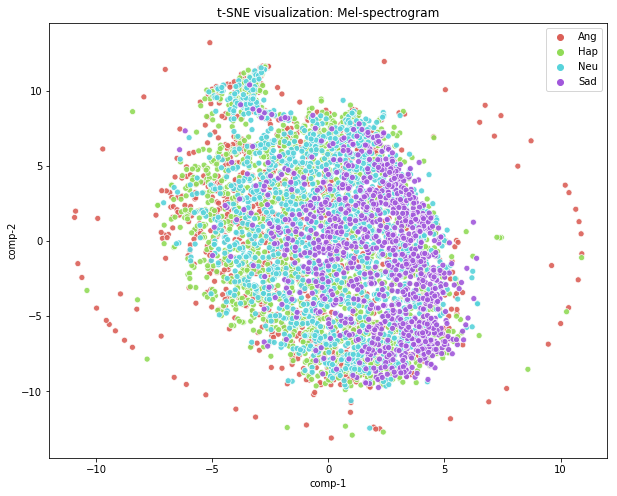

In [10]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
X_2d = tsne.fit_transform(X_pca)

df = pd.DataFrame()
df["y"] = y
df["comp-1"] = X_2d[:,0]
df["comp-2"] = X_2d[:,1]

plt.figure(figsize=(10,8))
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 4),
                data=df, legend="full", alpha=0.9).set(title="t-SNE visualization: Mel-spectrogram")
plt.savefig('/afs/inf.ed.ac.uk/user/s20/s2057508/Documents/phdwork/Layerwise/mel_arg.png')

In [ ]:
tsne = TSNE(n_components=2)
X_2d = tsne.fit_transform(X)

df = pd.DataFrame()
df["y"] = y
df["comp-1"] = X_2d[:,0]
df["comp-2"] = X_2d[:,1]

plt.figure(figsize=(10,8))
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 4),
                data=df, legend="full", alpha=0.9).set(title="t-SNE visualization: frequency")
plt.savefig('/afs/inf.ed.ac.uk/user/s20/s2057508/Documents/phdwork/Layerwise/frequency.png')

In [36]:
corr_frame_A0, _, coefs_A0 = pwcca.compute_pwcca(w2v2_A.T, w2v0_A.T, epsilon=1e-10)
# corr_frame_H0, _, coefs_H0 = pwcca.compute_pwcca(w2v0_H.T, w2v0_H.T, epsilon=1e-10)
# corr_frame_N0, _, coefs_N0 = pwcca.compute_pwcca(w2v0_N.T, w2v0_N.T, epsilon=1e-10)
# corr_frame_S0, _, coefs_S0 = pwcca.compute_pwcca(w2v0_S.T, w2v0_S.T, epsilon=1e-10)
# corr_frame_C0, _, coefs_C0 = pwcca.compute_pwcca(w2v0_C.T, w2v0_C.T, epsilon=1e-10)
# corr_frame_F0, _, coefs_F0 = pwcca.compute_pwcca(w2v0_F.T, w2v0_F.T, epsilon=1e-10)
# corr_frame_D0, _, coefs_D0 = pwcca.compute_pwcca(w2v0_D.T, w2v0_D.T, epsilon=1e-10)
# corr_frame_X0, _, coefs_X0 = pwcca.compute_pwcca(w2v0_X.T, w2v0_X.T, epsilon=1e-10)

corr_frame_A1, _, coefs_A1 = pwcca.compute_pwcca(w2v2_A.T, w2v1_A.T, epsilon=1e-10)
# corr_frame_H1, _, coefs_H1 = pwcca.compute_pwcca(w2v0_H.T, w2v1_H.T, epsilon=1e-10)
# corr_frame_N1, _, coefs_N1 = pwcca.compute_pwcca(w2v2_N.T, w2v1_N.T, epsilon=1e-10)
# corr_frame_S1, _, coefs_S1 = pwcca.compute_pwcca(w2v2_S.T, w2v1_S.T, epsilon=1e-10)
# corr_frame_C1, _, coefs_C1 = pwcca.compute_pwcca(w2v0_C.T, w2v1_C.T, epsilon=1e-10)
# corr_frame_F1, _, coefs_F1 = pwcca.compute_pwcca(w2v0_F.T, w2v1_F.T, epsilon=1e-10)
# corr_frame_D1, _, coefs_D1 = pwcca.compute_pwcca(w2v0_D.T, w2v1_D.T, epsilon=1e-10)
# corr_frame_X1, _, coefs_X1 = pwcca.compute_pwcca(w2v0_X.T, w2v1_X.T, epsilon=1e-10)

corr_frame_A2, _, coefs_A2 = pwcca.compute_pwcca(w2v2_A.T, w2v2_A.T, epsilon=1e-10)
# corr_frame_H2, _, coefs_H2 = pwcca.compute_pwcca(w2v0_H.T, w2v2_H.T, epsilon=1e-10)
# corr_frame_N2, _, coefs_N2 = pwcca.compute_pwcca(w2v2_N.T, w2v2_N.T, epsilon=1e-10)
# corr_frame_S2, _, coefs_S2 = pwcca.compute_pwcca(w2v2_S.T, w2v2_S.T, epsilon=1e-10)
# corr_frame_C2, _, coefs_C2 = pwcca.compute_pwcca(w2v0_C.T, w2v2_C.T, epsilon=1e-10)
# corr_frame_F2, _, coefs_F2 = pwcca.compute_pwcca(w2v0_F.T, w2v2_F.T, epsilon=1e-10)
# corr_frame_D2, _, coefs_D2 = pwcca.compute_pwcca(w2v0_D.T, w2v2_D.T, epsilon=1e-10)
# corr_frame_X2, _, coefs_X2 = pwcca.compute_pwcca(w2v0_X.T, w2v2_X.T, epsilon=1e-10)

corr_frame_A3, _, coefs_A3 = pwcca.compute_pwcca(w2v2_A.T, w2v3_A.T, epsilon=1e-10)
# corr_frame_H3, _, coefs_H3 = pwcca.compute_pwcca(w2v0_H.T, w2v3_H.T, epsilon=1e-10)
# corr_frame_N3, _, coefs_N3 = pwcca.compute_pwcca(w2v2_N.T, w2v3_N.T, epsilon=1e-10)
# corr_frame_S3, _, coefs_S3 = pwcca.compute_pwcca(w2v2_S.T, w2v3_S.T, epsilon=1e-10)
# corr_frame_C3, _, coefs_C3 = pwcca.compute_pwcca(w2v0_C.T, w2v3_C.T, epsilon=1e-10)
# corr_frame_F3, _, coefs_F3 = pwcca.compute_pwcca(w2v0_F.T, w2v3_F.T, epsilon=1e-10)
# corr_frame_D3, _, coefs_D3 = pwcca.compute_pwcca(w2v0_D.T, w2v3_D.T, epsilon=1e-10)
# corr_frame_X3, _, coefs_X3 = pwcca.compute_pwcca(w2v0_X.T, w2v3_X.T, epsilon=1e-10)

corr_frame_A4, _, coefs_A4 = pwcca.compute_pwcca(w2v2_A.T, w2v4_A.T, epsilon=1e-10)
# corr_frame_H4, _, coefs_H4 = pwcca.compute_pwcca(w2v0_H.T, w2v4_H.T, epsilon=1e-10)
# corr_frame_N4, _, coefs_N4 = pwcca.compute_pwcca(w2v2_N.T, w2v4_N.T, epsilon=1e-10)
# corr_frame_S4, _, coefs_S4 = pwcca.compute_pwcca(w2v2_S.T, w2v4_S.T, epsilon=1e-10)
# corr_frame_C4, _, coefs_C4 = pwcca.compute_pwcca(w2v0_C.T, w2v4_C.T, epsilon=1e-10)
# corr_frame_F4, _, coefs_F4 = pwcca.compute_pwcca(w2v0_F.T, w2v4_F.T, epsilon=1e-10)
# corr_frame_D4, _, coefs_D4 = pwcca.compute_pwcca(w2v0_D.T, w2v4_D.T, epsilon=1e-10)
# corr_frame_X4, _, coefs_X4 = pwcca.compute_pwcca(w2v0_X.T, w2v4_X.T, epsilon=1e-10)

corr_frame_A5, _, coefs_A5 = pwcca.compute_pwcca(w2v2_A.T, w2v5_A.T, epsilon=1e-10)
# corr_frame_H5, _, coefs_H5 = pwcca.compute_pwcca(w2v0_H.T, w2v5_H.T, epsilon=1e-10)
# corr_frame_N5, _, coefs_N5 = pwcca.compute_pwcca(w2v2_N.T, w2v5_N.T, epsilon=1e-10)
# corr_frame_S5, _, coefs_S5 = pwcca.compute_pwcca(w2v2_S.T, w2v5_S.T, epsilon=1e-10)
# corr_frame_C5, _, coefs_C5 = pwcca.compute_pwcca(w2v0_C.T, w2v5_C.T, epsilon=1e-10)
# corr_frame_F5, _, coefs_F5 = pwcca.compute_pwcca(w2v0_F.T, w2v5_F.T, epsilon=1e-10)
# corr_frame_D5, _, coefs_D5 = pwcca.compute_pwcca(w2v0_D.T, w2v5_D.T, epsilon=1e-10)
# corr_frame_X5, _, coefs_X5 = pwcca.compute_pwcca(w2v0_X.T, w2v5_X.T, epsilon=1e-10)

corr_frame_A6, _, coefs_A6 = pwcca.compute_pwcca(w2v2_A.T, w2v6_A.T, epsilon=1e-10)
# corr_frame_H6, _, coefs_H6 = pwcca.compute_pwcca(w2v0_H.T, w2v6_H.T, epsilon=1e-10)
# corr_frame_N6, _, coefs_N6 = pwcca.compute_pwcca(w2v2_N.T, w2v6_N.T, epsilon=1e-10)
# corr_frame_S6, _, coefs_S6 = pwcca.compute_pwcca(w2v2_S.T, w2v6_S.T, epsilon=1e-10)
# corr_frame_C6, _, coefs_C6 = pwcca.compute_pwcca(w2v0_C.T, w2v6_C.T, epsilon=1e-10)
# corr_frame_F6, _, coefs_F6 = pwcca.compute_pwcca(w2v0_F.T, w2v6_F.T, epsilon=1e-10)
# corr_frame_D6, _, coefs_D6 = pwcca.compute_pwcca(w2v0_D.T, w2v6_D.T, epsilon=1e-10)
# corr_frame_X6, _, coefs_X6 = pwcca.compute_pwcca(w2v0_X.T, w2v6_X.T, epsilon=1e-10)

corr_frame_A7, _, coefs_A7 = pwcca.compute_pwcca(w2v2_A.T, w2v7_A.T, epsilon=1e-10)
# corr_frame_H7, _, coefs_H7 = pwcca.compute_pwcca(w2v0_H.T, w2v7_H.T, epsilon=1e-10)
# corr_frame_N7, _, coefs_N7 = pwcca.compute_pwcca(w2v2_N.T, w2v7_N.T, epsilon=1e-10)
# corr_frame_S7, _, coefs_S7 = pwcca.compute_pwcca(w2v2_S.T, w2v7_S.T, epsilon=1e-10)
# corr_frame_C7, _, coefs_C7 = pwcca.compute_pwcca(w2v0_C.T, w2v7_C.T, epsilon=1e-10)
# corr_frame_F7, _, coefs_F7 = pwcca.compute_pwcca(w2v0_F.T, w2v7_F.T, epsilon=1e-10)
# corr_frame_D7, _, coefs_D7 = pwcca.compute_pwcca(w2v0_D.T, w2v7_D.T, epsilon=1e-10)
# corr_frame_X7, _, coefs_X7 = pwcca.compute_pwcca(w2v0_X.T, w2v7_X.T, epsilon=1e-10)

corr_frame_A8, _, coefs_A8 = pwcca.compute_pwcca(w2v2_A.T, w2v8_A.T, epsilon=1e-10)
# corr_frame_H8, _, coefs_H8 = pwcca.compute_pwcca(w2v0_H.T, w2v8_H.T, epsilon=1e-10)
# corr_frame_N8, _, coefs_N8 = pwcca.compute_pwcca(w2v2_N.T, w2v8_N.T, epsilon=1e-10)
# corr_frame_S8, _, coefs_S8 = pwcca.compute_pwcca(w2v2_S.T, w2v8_S.T, epsilon=1e-10)
# corr_frame_C8, _, coefs_C8 = pwcca.compute_pwcca(w2v0_C.T, w2v8_C.T, epsilon=1e-10)
# corr_frame_F8, _, coefs_F8 = pwcca.compute_pwcca(w2v0_F.T, w2v8_F.T, epsilon=1e-10)
# corr_frame_D8, _, coefs_D8 = pwcca.compute_pwcca(w2v0_D.T, w2v8_D.T, epsilon=1e-10)
# corr_frame_X8, _, coefs_X8 = pwcca.compute_pwcca(w2v0_X.T, w2v8_X.T, epsilon=1e-10)

corr_frame_A9, _, coefs_A9 = pwcca.compute_pwcca(w2v2_A.T, w2v9_A.T, epsilon=1e-10)
# corr_frame_H9, _, coefs_H9 = pwcca.compute_pwcca(w2v0_H.T, w2v9_H.T, epsilon=1e-10)
# corr_frame_N9, _, coefs_N9 = pwcca.compute_pwcca(w2v2_N.T, w2v9_N.T, epsilon=1e-10)
# corr_frame_S9, _, coefs_S9 = pwcca.compute_pwcca(w2v2_S.T, w2v9_S.T, epsilon=1e-10)
# corr_frame_C9, _, coefs_C9 = pwcca.compute_pwcca(w2v0_C.T, w2v9_C.T, epsilon=1e-10)
# corr_frame_F9, _, coefs_F9 = pwcca.compute_pwcca(w2v0_F.T, w2v9_F.T, epsilon=1e-10)
# corr_frame_D9, _, coefs_D9 = pwcca.compute_pwcca(w2v0_D.T, w2v9_D.T, epsilon=1e-10)
# corr_frame_X9, _, coefs_X9 = pwcca.compute_pwcca(w2v0_X.T, w2v9_X.T, epsilon=1e-10)

corr_frame_A10, _, coefs_A10 = pwcca.compute_pwcca(w2v2_A.T, w2v10_A.T, epsilon=1e-10)
# corr_frame_H10, _, coefs_H10 = pwcca.compute_pwcca(w2v0_H.T, w2v10_H.T, epsilon=1e-10)
# corr_frame_N10, _, coefs_N10 = pwcca.compute_pwcca(w2v2_N.T, w2v10_N.T, epsilon=1e-10)
# corr_frame_S10, _, coefs_S10 = pwcca.compute_pwcca(w2v2_S.T, w2v10_S.T, epsilon=1e-10)
# corr_frame_C10, _, coefs_C10 = pwcca.compute_pwcca(w2v0_C.T, w2v10_C.T, epsilon=1e-10)
# corr_frame_F10, _, coefs_F10 = pwcca.compute_pwcca(w2v0_F.T, w2v10_F.T, epsilon=1e-10)
# corr_frame_D10, _, coefs_D10 = pwcca.compute_pwcca(w2v0_D.T, w2v10_D.T, epsilon=1e-10)
# corr_frame_X10, _, coefs_X10 = pwcca.compute_pwcca(w2v0_X.T, w2v10_X.T, epsilon=1e-10)

corr_frame_A11, _, coefs_A11 = pwcca.compute_pwcca(w2v2_A.T, w2v11_A.T, epsilon=1e-10)
# corr_frame_H11, _, coefs_H11 = pwcca.compute_pwcca(w2v0_H.T, w2v11_H.T, epsilon=1e-10)
# corr_frame_N11, _, coefs_N11 = pwcca.compute_pwcca(w2v2_N.T, w2v11_N.T, epsilon=1e-10)
# corr_frame_S11, _, coefs_S11 = pwcca.compute_pwcca(w2v2_S.T, w2v11_S.T, epsilon=1e-10)
# corr_frame_C11, _, coefs_C11 = pwcca.compute_pwcca(w2v0_C.T, w2v11_C.T, epsilon=1e-10)
# corr_frame_F11, _, coefs_F11 = pwcca.compute_pwcca(w2v0_F.T, w2v11_F.T, epsilon=1e-10)
# corr_frame_D11, _, coefs_D11 = pwcca.compute_pwcca(w2v0_D.T, w2v11_D.T, epsilon=1e-10)
# corr_frame_X11, _, coefs_X11 = pwcca.compute_pwcca(w2v0_X.T, w2v11_X.T, epsilon=1e-10)

corr_frame_A12, _, coefs_A12 = pwcca.compute_pwcca(w2v2_A.T, w2v12_A.T, epsilon=1e-10)
# corr_frame_H12, _, coefs_H12 = pwcca.compute_pwcca(w2v0_H.T, w2v12_H.T, epsilon=1e-10)
# corr_frame_N12, _, coefs_N12 = pwcca.compute_pwcca(w2v2_N.T, w2v12_N.T, epsilon=1e-10)
# corr_frame_S12, _, coefs_S12 = pwcca.compute_pwcca(w2v2_S.T, w2v12_S.T, epsilon=1e-10)
# corr_frame_C12, _, coefs_C12 = pwcca.compute_pwcca(w2v0_C.T, w2v12_C.T, epsilon=1e-10)
# corr_frame_F12, _, coefs_F12 = pwcca.compute_pwcca(w2v0_F.T, w2v12_F.T, epsilon=1e-10)
# corr_frame_D12, _, coefs_D12 = pwcca.compute_pwcca(w2v0_D.T, w2v12_D.T, epsilon=1e-10)
# corr_frame_X12, _, coefs_X12 = pwcca.compute_pwcca(w2v0_X.T, w2v12_X.T, epsilon=1e-10)


print('Layer 0')
print('A:', corr_frame_A0)
print('A:', np.mean(coefs_A0))
# print('H:', corr_frame_H0)
# print('N:', corr_frame_N0)
# print('S:', corr_frame_S0)
# print('C:', np.mean(coefs_C0))
# print('F:', np.mean(coefs_F0))
# print('D:', np.mean(coefs_D0))
# print('X:', np.mean(coefs_X0))

print('Layer 1')
print('A:', corr_frame_A1)
print('A:', np.mean(coefs_A1))
# print('H:', corr_frame_H1)
# print('N:', corr_frame_N1)
# print('S:', corr_frame_S1)
# print('C:', np.mean(coefs_C1))
# print('F:', np.mean(coefs_F1))
# print('D:', np.mean(coefs_D1))
# print('X:', np.mean(coefs_X1))

print('Layer 2')
print('A:', corr_frame_A2)
print('A:', np.mean(coefs_A2))
# print('H:', corr_frame_H2)
# print('N:', corr_frame_N2)
# print('S:', corr_frame_S2)
# print('C:', np.mean(coefs_C2))
# print('F:', np.mean(coefs_F2))
# print('D:', np.mean(coefs_D2))
# print('X:', np.mean(coefs_X2))

print('Layer 3')
print('A:', corr_frame_A3)
print('A:', np.mean(coefs_A3))
# print('H:', corr_frame_H3)
# print('N:', corr_frame_N3)
# print('S:', corr_frame_S3)
# print('C:', np.mean(coefs_C3))
# print('F:', np.mean(coefs_F3))
# print('D:', np.mean(coefs_D3))
# print('X:', np.mean(coefs_X3))

print('Layer 4')
print('A:', corr_frame_A4)
print('A:', np.mean(coefs_A4))
# print('H:', corr_frame_H4)
# print('N:', corr_frame_N4)
# print('S:', corr_frame_S4)
# print('C:', np.mean(coefs_C4))
# print('F:', np.mean(coefs_F4))
# print('D:', np.mean(coefs_D4))
# print('X:', np.mean(coefs_X4))

print('Layer 5')
print('A:', corr_frame_A5)
print('A:', np.mean(coefs_A5))
# print('H:', corr_frame_H5)
# print('N:', corr_frame_N5)
# print('S:', corr_frame_S5)
# print('C:', np.mean(coefs_C5))
# print('F:', np.mean(coefs_F5))
# print('D:', np.mean(coefs_D5))
# print('X:', np.mean(coefs_X5))

print('Layer 6')
print('A:', corr_frame_A6)
print('A:', np.mean(coefs_A6))
# print('H:', corr_frame_H6)
# print('N:', corr_frame_N6)
# print('S:', corr_frame_S6)
# print('C:', np.mean(coefs_C6))
# print('F:', np.mean(coefs_F6))
# print('D:', np.mean(coefs_D6))
# print('X:', np.mean(coefs_X6))

print('Layer 7')
print('A:', corr_frame_A7)
print('A:', np.mean(coefs_A7))
# print('H:', corr_frame_H7)
# print('N:', corr_frame_N7)
# print('S:', corr_frame_S7)
# print('C:', np.mean(coefs_C7))
# print('F:', np.mean(coefs_F7))
# print('D:', np.mean(coefs_D7))
# print('X:', np.mean(coefs_X7))

print('Layer 8')
print('A:', corr_frame_A8)
print('A:', np.mean(coefs_A8))
# print('H:', corr_frame_H8)
# print('N:', corr_frame_N8)
# print('S:', corr_frame_S8)
# print('C:', np.mean(coefs_C8))
# print('F:', np.mean(coefs_F8))
# print('D:', np.mean(coefs_D8))
# print('X:', np.mean(coefs_X8))

print('Layer 9')
print('A:', corr_frame_A9)
print('A:', np.mean(coefs_A9))
# print('H:', corr_frame_H9)
# print('N:', corr_frame_N9)
# print('S:', corr_frame_S9)
# print('C:', np.mean(coefs_C9))
# print('F:', np.mean(coefs_F9))
# print('D:', np.mean(coefs_D9))
# print('X:', np.mean(coefs_X9))

print('Layer 10')
print('A:', corr_frame_A10)
print('A:', np.mean(coefs_A10))
# print('H:', corr_frame_H10)
# print('N:', corr_frame_N10)
# print('S:', corr_frame_S10)
# print('C:', np.mean(coefs_C10))
# print('F:', np.mean(coefs_F10))
# print('D:', np.mean(coefs_D10))
# print('X:', np.mean(coefs_X10))

print('Layer 11')
print('A:', corr_frame_A11)
print('A:', np.mean(coefs_A11))
# print('H:', corr_frame_H11)
# print('N:', corr_frame_N11)
# print('S:', corr_frame_S11)
# print('C:', np.mean(coefs_C11))
# print('F:', np.mean(coefs_F11))
# print('D:', np.mean(coefs_D11))
# print('X:', np.mean(coefs_X11))

print('Layer 12')
print('A:', corr_frame_A12)
print('A:', np.mean(coefs_A12))
# print('H:', corr_frame_H12)
# print('N:', corr_frame_N12)
# print('S:', corr_frame_S12)
# print('C:', np.mean(coefs_C12))
# print('F:', np.mean(coefs_F12))
# print('D:', np.mean(coefs_D12))
# print('X:', np.mean(coefs_X12))

Layer 0
A: 0.6191804342421059
A: 0.40405413435011917
Layer 1
A: 0.7476431484810311
A: 0.5459175227477616
Layer 2
A: 0.9992958769887962
A: 0.9986978963484328
Layer 3
A: 0.7594987083483262
A: 0.5451882298280946
Layer 4
A: 0.6579819710798197
A: 0.4376611684506883
Layer 5
A: 0.6012504912174202
A: 0.3886936855070186
Layer 6
A: 0.5725313000734374
A: 0.3656273320326815
Layer 7
A: 0.5551803576746827
A: 0.35198402425677244
Layer 8
A: 0.5460562089116574
A: 0.34530591198374716
Layer 9
A: 0.541943979750202
A: 0.34234314423083195
Layer 10
A: 0.5292499394286573
A: 0.3336428717494191
Layer 11
A: 0.4865723059237114
A: 0.2998984366684981
Layer 12
A: 0.4917473676090508
A: 0.30761415496845057


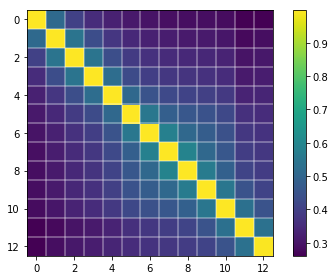

In [37]:
test_array = [[0.9986981382886615, 0.5124942758402701, 0.40405413433428133, 0.3553730338401826, 0.32862776008262856, 0.312174374608674, 0.3000560235748543, 0.2921631325358576, 0.2891349404376598, 0.28814096523528837, 0.28423603487662935, 0.26089972882633045, 0.2616264600968248],
              [0.5124942758289344, 0.9986978713603323, 0.5459175227555868, 0.4344266793366458, 0.3784319527342288, 0.3459210577493501, 0.32958354239440024, 0.3194987380697838, 0.3149522997756642, 0.31282705094138924, 0.3067017118060062, 0.2789500855091467, 0.2884105204398868],
              [0.40405413435011917, 0.5459175227477616, 0.9986978963484328, 0.5451882298280946, 0.4376611684506883, 0.3886936855070186, 0.3656273320326815, 0.35198402425677244, 0.34530591198374716, 0.34234314423083195, 0.3336428717494191, 0.2998984366684981, 0.30761415496845057],
              [0.35537303384123237, 0.4344266793392116, 0.5451882298261775, 0.9986978747024532, 0.5241550503813007, 0.4302324967515932, 0.39879638472365103, 0.3810989763960982, 0.3720754632495968, 0.3669788921215999, 0.3544304503652908, 0.3136108268351454, 0.31979812198853214],
              [0.328627760085834, 0.37843195273439845, 0.43766116845098185, 0.5241550503787241, 0.9986978610642483, 0.5087581383472853, 0.4484618137805996, 0.42236486197495254, 0.4092607177385053, 0.4019509521520008, 0.3840892358323635, 0.33470389906323045, 0.33673606773205295],
              [0.3121743746058199, 0.34592105775199955, 0.3886936855108722, 0.4302324967534046, 0.508758138347147, 0.998697889813708, 0.5519997437676301, 0.4845792178273815, 0.4601699091594083, 0.4467491464934086, 0.42143616860683203, 0.3630787092816228, 0.35533314939162924],
              [0.30005602356206523, 0.3295835423984255, 0.3656273320336221, 0.3987963847209381, 0.4484618137792266, 0.5519997437697616, 0.9986978997335897, 0.5820712353384101, 0.5091090859536415, 0.47859868858293325, 0.44523671614561167, 0.38180771706727784, 0.3687330394720741],
              [0.29216313253550436, 0.31949873807177154, 0.35198402425650593, 0.38109897639509144, 0.4223648619733154, 0.4845792178278107, 0.5820712353382612, 0.9986978916584505, 0.5921790502438052, 0.5100316665398524, 0.4622515872128081, 0.39440754141284895, 0.37943291134220375],
              [0.2891349404347639, 0.3149522997791582, 0.3453059119847786, 0.3720754632455394, 0.40926071774160006, 0.4601699091600721, 0.5091090859562989, 0.5921790502418828, 0.9986978540630336, 0.567287214876797, 0.48780128171952053, 0.4127606405196263, 0.39162061593675074],
              [0.2881409652280829, 0.3128270509441459, 0.3423431442325613, 0.36697889212161766, 0.4019509521515306, 0.446749146494877, 0.47859868858043536, 0.5100316665406608, 0.5672872148750612, 0.9986977909247097, 0.5503302086279067, 0.44979189197917285, 0.407972025898871],
              [0.28423603487035987, 0.3067017118085589, 0.33364287175032725, 0.3544304503656473, 0.38408923583311055, 0.42143616860768723, 0.4452367161470378, 0.46225158721299714, 0.48780128171954784, 0.5503302086259924, 0.9986976710108221, 0.5339537365613413, 0.4500377251593997],
              [0.2608997288267714, 0.2789500855085335, 0.29989843666746124, 0.31361082683608926, 0.33470389906376136, 0.363078709283025, 0.38180771706575617, 0.394407541413847, 0.41276064052074296, 0.4497918919784067, 0.5339537365624042, 0.9986966059529824, 0.5373043428457751],
              [0.26162646009725776, 0.28841052043996834, 0.30761415496845806, 0.3197981219885146, 0.3367360677321199, 0.3553331493916461, 0.3687330394721717, 0.37943291134227003, 0.39162061593666203, 0.40797202589891396, 0.4500377251593181, 0.5373043428458212, 0.9948982583687448]]

# plt.figure(figsize=(3, 3), dpi=150)
phone = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13])

# enc = features[0, :, :].detach().numpy()
# enc /= np.sqrt((enc**2).sum(1, keepdims=True))
# sims = (enc @ enc.T) / enc.shape[-1]

plt.imshow(test_array)
for boundary in np.where(np.diff(phone))[0] + 0.5:
    plt.axhline(boundary, color='w', linewidth=2, alpha=0.3)
    plt.axvline(boundary, color='w', linewidth=2, alpha=0.3)
plt.colorbar()
plt.tight_layout()
# plt.axis('off')
# bars = np.concatenate([[0], np.where(np.diff(phone))[0], [np.array(test_array).shape[1]-1]])
# # bars = np.concatenate([0], [1], phone[:-1])
# phone_locs = (bars[:-1] + bars[1:]) / 2
# _ = plt.xticks(phone_locs, [str(p) for p in phone[bars[1:]]])
# _ = plt.yticks(phone_locs, [str(p) for p in phone[bars[1:]]])